In [1]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

def currency_rate(cur1='USD', cur2='EUR', api_key = 'OZHBQ2Q48QC0NFRZ'):
    rate = requests.get(f'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={cur1}&to_currency={cur2}&apikey={api_key}').json()
    rate = rate['Realtime Currency Exchange Rate']
    return pd.DataFrame([rate.values()], columns=rate.keys())


def continuous_rate(cur1='USD', cur2='EUR', seconds = 15):
    data = currency_rate(cur1, cur2)
    while True:
        time.sleep(seconds)
        data_next = currency_rate(cur1, cur2)
        data = data.append(data_next)
        data.to_csv('../data/time_series_data.csv')

        
        
# if __name__ = '__main__':        
#     continuous_rate('USD','EUR')

In [31]:
def historic_rate(cur1='USD', cur2='EUR', interval = '5min', api_key = 'OZHBQ2Q48QC0NFRZ'):
    rate = requests.get(f"https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol={cur1}&to_symbol={cur2}&interval={interval}&apikey={api_key}").json()
    rate = pd.DataFrame(rate[f'Time Series FX ({interval})']).T
    return rate.iloc[::-1]

def continuous_historic_rate(cur1='USD', cur2='EUR',seconds = 300):
    data = historic_rate(cur1,cur2)
    data.to_csv('../data/historic_time_series_data.csv')
    while True:
        time.sleep(seconds)
        data_next = historic_rate(cur1,cur2).iloc[-1]
        data = data.append(data_next)
        data.to_csv('../data/historic_time_series_data.csv')

                     1. open  2. high   3. low 4. close
2021-07-02 06:55:00  0.84460  0.84460  0.84440  0.84440
2021-07-02 07:00:00  0.84450  0.84450  0.84430  0.84430
2021-07-02 07:05:00  0.84450  0.84500  0.84450  0.84470
2021-07-02 07:10:00  0.84490  0.84530  0.84490  0.84530
2021-07-02 07:15:00  0.84520  0.84530  0.84510  0.84530
...                      ...      ...      ...      ...
2021-07-02 14:55:00  0.84480  0.84480  0.84460  0.84470
2021-07-02 15:00:00  0.84440  0.84470  0.84410  0.84420
2021-07-02 15:05:00  0.84410  0.84420  0.84380  0.84410
2021-07-02 15:10:00  0.84400  0.84400  0.84390  0.84400
2021-07-02 15:10:00  0.84400  0.84400  0.84390  0.84400

[101 rows x 4 columns]


In [32]:
pd.read_csv('../data/historic_time_series_data.csv')

,Unnamed: 0,1. open,2. high,3. low,4. close
0,2021-07-02 15:15:00,1.18452,1.18481,1.1843,1.18475
1,2021-07-02 15:10:00,1.18435,1.18465,1.1842,1.18440
2,2021-07-02 15:05:00,1.18426,1.18450,1.1839,1.18420
3,2021-07-02 15:00:00,1.18349,1.18440,1.1832,1.18427
4,2021-07-02 14:55:00,1.18326,1.18362,1.1830,1.18349
...,...,...,...,...,...
95,2021-07-02 07:20:00,1.18230,1.18274,1.1822,1.18271
96,2021-07-02 07:15:00,1.18279,1.18303,1.1822,1.18236
97,2021-07-02 07:10:00,1.18305,1.18334,1.1825,1.18278
98,2021-07-02 07:05:00,1.18380,1.18391,1.1828,1.18290


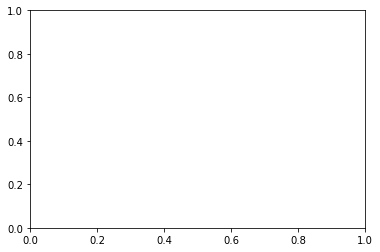

In [4]:
%matplotlib inline
fig = plt.figure()
#creating a subplot 
ax = fig.add_subplot(1,1,1)

def animate(i, file = 'time_series_data.csv'):
    data = pd.read_csv(f'../data/{file}')
    xs = []
    ys = []
    values = data['5. Exchange Rate'].values
    for x,y in zip(range(len(values)), values):
        xs.append(x)
        ys.append(y)
    ax.clear()
    ax.plot(xs,ys)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('EUR/USD')
    fig.autofmt_xdate(rotation=45)

    
ani = FuncAnimation(fig, animate, interval=15000) 
plt.show()

In [33]:
%matplotlib inline
fig = plt.figure()
#creating a subplot 
ax = fig.add_subplot(1,1,1)

def historic_animate(i, file = 'historic_time_series_data.csv'):
    data = pd.read_csv(f'../data/{file}')
    xs = []
    ys = []
    values = data['4. close'].values
    ax.plot(values,range(len(values)))
    for x,y in zip(range(len(values)), values):
        xs.append(x)
        ys.append(y)
    ax.clear()
    ax.plot(xs,ys)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('EUR/USD')
    fig.autofmt_xdate(rotation=45)

    
ani = FuncAnimation(fig, historic_animate, interval=300000) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-40fdc8691508>, line 12)

In [ ]:
def RSI(data, periods = 14):
    # Momentum indicator
    # 0-100. 70 = Overbought. 30 = Oversold

In [ ]:
def 